In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

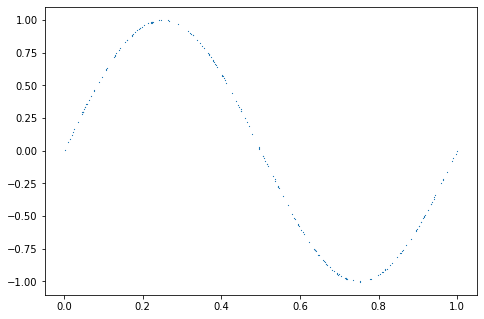

In [3]:
test=pd.read_csv("test.csv")
test.columns=['x','y']
feature_test=test['x']
x_test=feature_test.to_numpy()
x_test=x_test.reshape(x_test.size,1)
outputs_test=test['y']
y_test=outputs_test.to_numpy()
y_test=y_test.reshape(y_test.size,1)
#plotting testing data

figt=plt.figure()
axt=figt.add_axes([0,0,1,1])
axt.scatter(x_test,y_test,s=.1,alpha=1,marker="*")

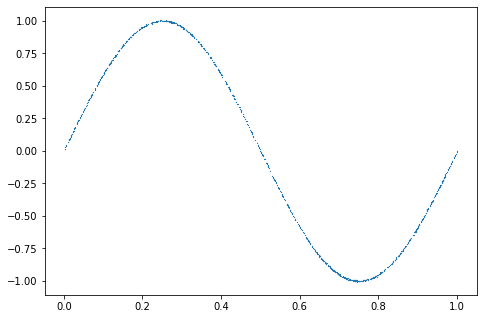

In [4]:
train=pd.read_csv("train.csv")
train.columns=['x','y']
feature=train['x']
outputs=train['y']
y=outputs.to_numpy()
y=y.reshape(y.size,1)
x=feature.to_numpy()
x=x.reshape(x.size,1)

#plotting training data
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,s=.1,alpha=1,marker="*")

In [5]:
#Processing training data
x=np.insert(x,0,1,1)
x_new=np.zeros((x.shape[0],10))
x_new[:,:2]=x
x_new[:,2:]=x[:,1:2]
x_new[:,2:]=np.power(x_new[:,2:],np.arange(2,10,1))

In [6]:
#Processing test data
x_test=np.insert(x_test,0,1,1)
x_test_new=np.zeros((x_test.shape[0],10))
x_test_new[:,:2]=x_test
x_test_new[:,2:]=x_test[:,1:2]
x_test_new[:,2:]=np.power(x_test_new[:,2:],np.arange(2,10,1))

Feature Scaling

In [7]:
st_dev=np.zeros(10)
np.std(x_new,axis=0,out=st_dev)
st_dev[0]=1
averages=np.zeros(10)
np.mean(x_new,axis=0,out=averages)
averages[0]=0
x_scaled=(x_new-averages)/st_dev
x_test_scaled=(x_test_new-averages)/st_dev

Regression

In [8]:
h_theta=np.zeros((1000,1))
errors=np.zeros((1000,1))
train_errors=np.zeros(9)
test_errors=np.zeros(9)

In [51]:
thetas=[np.zeros((i,1)) for i in range(2,11,1)]
alpha=.05
m=x_scaled.shape[0]
individual_errors=np.zeros((y.shape[0],1))
for i in range(2,11,1):
    prev_error=float('inf')
    theta=thetas[i-2]
    while(True):
        h_theta=np.matmul(x_scaled[:,:i],thetas[i-2])
        individual_errors=h_theta-y
        partial=np.matmul(x_scaled[:,:i].transpose(),individual_errors)/m
        if(np.sum(partial**2)**.5<.001):
            train_errors[i-2]=2*np.sum(individual_errors**2)/(2*m)
            break
        thetas[i-2]=thetas[i-2]-alpha*partial

In [69]:
thetas[7]

array([[-0.05058147],
       [ 2.28827112],
       [-4.5233917 ],
       [-1.87774694],
       [ 1.11379286],
       [ 2.39598847],
       [ 1.98629025],
       [ 0.34404446],
       [-2.08320272]])

In [52]:
#Training Error
train_errors

array([0.19935912, 0.1982394 , 0.00534658, 0.00911693, 0.01045499,
       0.00454551, 0.00214545, 0.00141057, 0.00176905])

In [54]:
#Finding Test Errors
m=x_test.shape[0]
for i in range(2,11,1):
    h_theta=np.matmul(x_test_scaled[:,:i],thetas[i-2])
    individual_errors=h_theta-y_test
    test_errors[i-2]=np.sum(individual_errors**2)/m

In [55]:
test_errors

array([0.1910934 , 0.19175872, 0.00541387, 0.00918729, 0.01053331,
       0.00452566, 0.00209268, 0.00136451, 0.00178645])

In [56]:
#Function to preprocess the input data to model to generate output convinently
def process(x):
    x_temp=x.reshape(x.size,1)
    x_temp=np.insert(x_temp,0,1,1)
    x_new=np.zeros((x_temp.shape[0],10))
    x_new[:,:2]=x_temp
    x_new[:,2:]=x_temp[:,1:2]
    x_new[:,2:]=np.power(x_new[:,2:],np.arange(2,10,1))
    x_new=(x_new-averages)/st_dev
    return x_new

In [57]:
x_plot=np.linspace(0,1,200)
x_plot_processed=process(x_plot)

In [58]:
y_plots=np.zeros((x_plot.shape[0],9))
for i in range(0,9):
    y_plots[:,i:i+1]=np.matmul(x_plot_processed[:,:i+2],thetas[i])

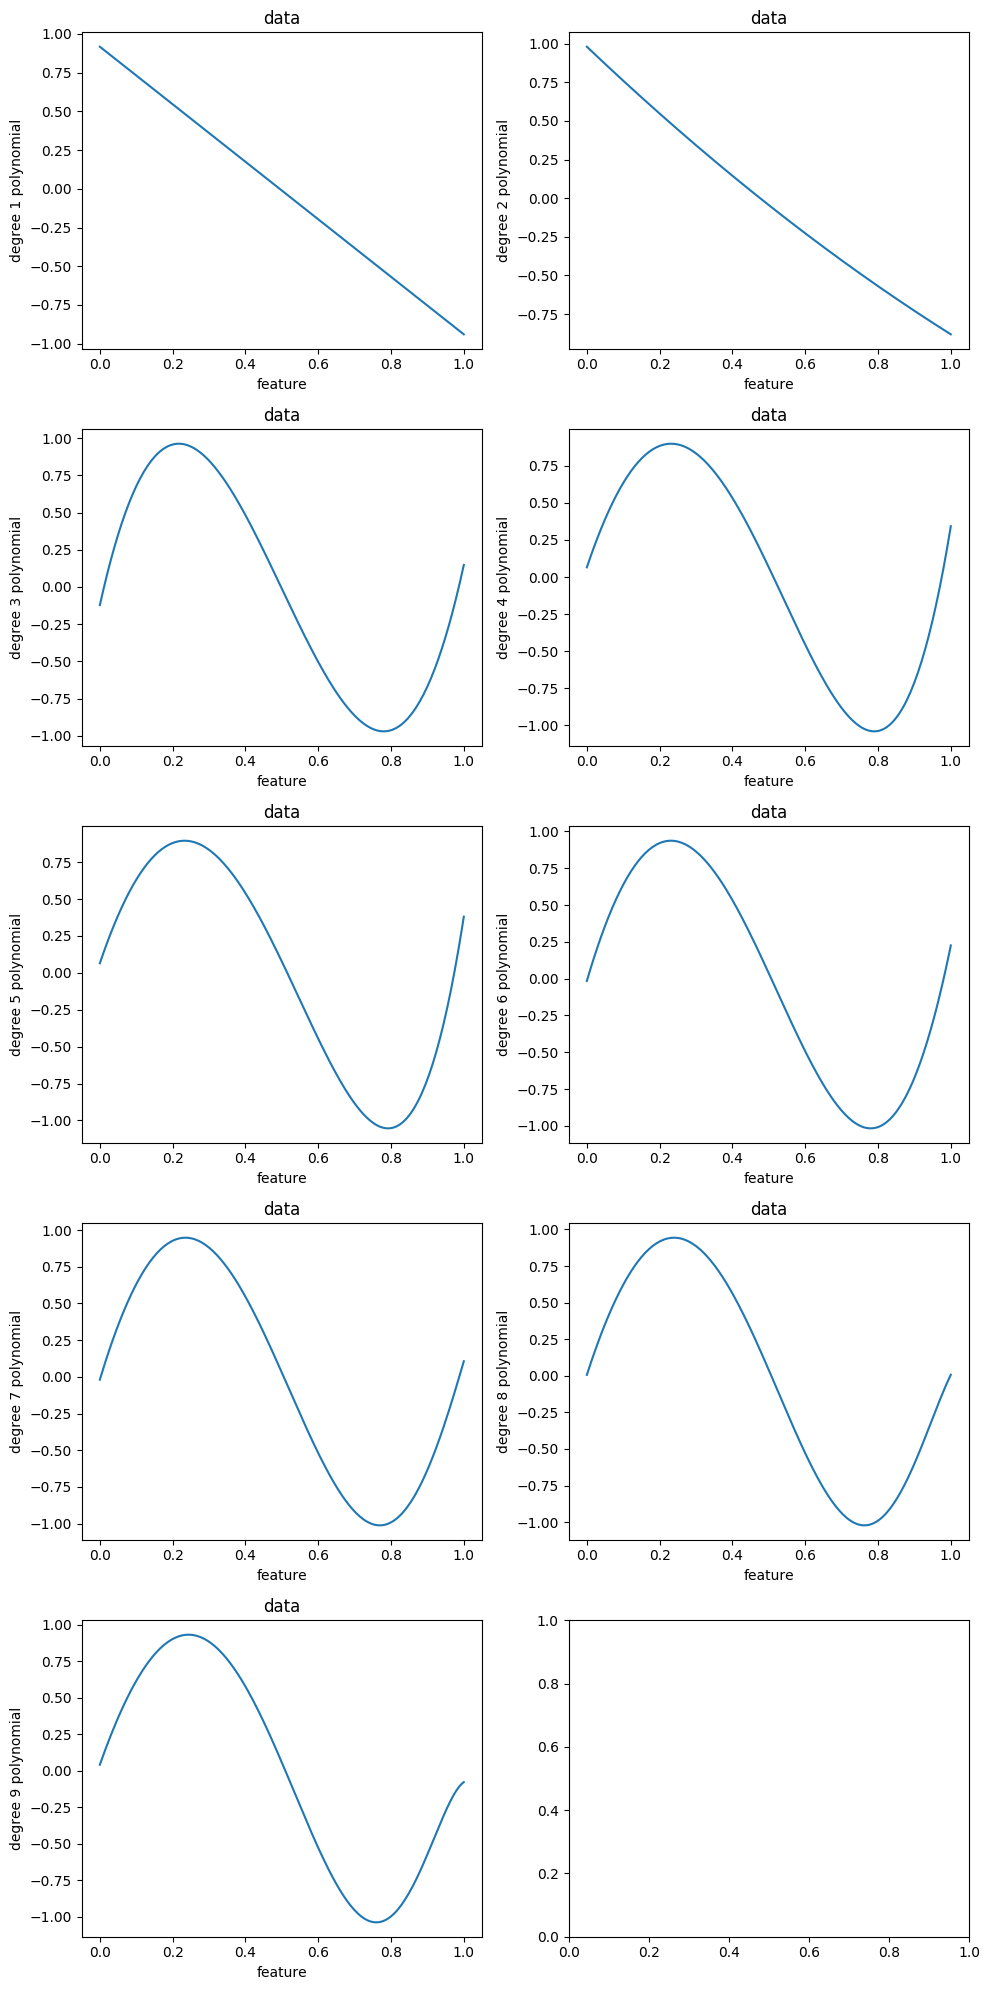

In [59]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(10,20),dpi=100)

for i in range(0,9):
    axes[int(i/2),i%2].plot(x_plot, y_plots[:,i:i+1])
    axes[int(i/2),i%2].set_xlabel('feature')
    axes[int(i/2),i%2].set_ylabel(f"degree {i+1} polynomial")
    axes[int(i/2),i%2].set_title('data')

fig
plt.tight_layout()

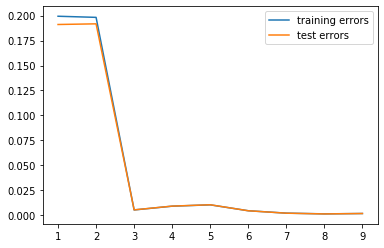

In [60]:
fig1,ax1=plt.subplots()
x=np.arange(1,10)
ax1.plot(x,train_errors,label="training errors")
ax1.plot(x,test_errors,label="test errors")
ax1.legend()
#ax1.set_ylim(0,.09)

So n=8 is suitable for given dataset as for this value of n the training error and test error is minimum

In [70]:
alpha=.05
prev_error=float("inf")
theta=np.zeros(10)
theta.resize((10,1))
m=x.shape[0]
while(True):
    h_theta=np.matmul(x_scaled,theta)
    errors=h_theta-y
    curr_error=np.sum(errors**2)/(2*m)
    #print("curr_error is ")
    #print(curr_error)
    if(prev_error-curr_error<.0000001):
        break
    prev_error=curr_error
    theta=theta-(alpha/m)*np.matmul(x_scaled.transpose(),errors)
    

In [71]:
theta

array([[-0.28100819],
       [-3.08057404],
       [-2.9451421 ],
       [-2.61273788],
       [-2.27195562],
       [-1.97137431],
       [-1.71831237],
       [-1.50820467],
       [-1.333898  ],
       [-1.18856371]])

In [352]:
x_scaled

array([[ 1.        ,  1.48458976,  1.83129768, ...,  2.62018049,
         2.69050947,  2.74493764],
       [ 1.        ,  0.65165252,  0.48784353, ..., -0.20635423,
        -0.26749676, -0.31108243],
       [ 1.        ,  1.25878654,  1.42785175, ...,  1.33703802,
         1.25795679,  1.17430239],
       ...,
       [ 1.        ,  0.88898985,  0.83018135, ...,  0.16868357,
         0.07113185, -0.01073254],
       [ 1.        , -1.57838523, -1.15364159, ..., -0.60760904,
        -0.56825156, -0.53587752],
       [ 1.        , -0.30613483, -0.56599482, ..., -0.59624045,
        -0.56313006, -0.53357677]])